In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv(r"C:\Users\Lenovo LoQ Laptop\AppData\Local\Microsoft\Windows\INetCache\IE\35KEWM7Z\Sample_-_Superstore[1].csv", encoding='ISO-8859-1')

In [5]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# problem
### dirty data:
    * in order_date month and day is replace =>accuracy
    *in ship-date there is gap in value use strip => consistency
    * drop the country column cause all same value =>useless
    * some postal code has 4 digit instead of 5 => validity
    *3406 row id and 3406 row_id are same so drop one =>validity
    *order date and ship date should be datetime dtype =>validity

### messy data:
    * in discount column 0 mean no discount 0.2 mean 20% discount like that
    * profit column should be split into loss and profit
    * we can create a column shipping duration ship date -order date
    *
    

### Automatic Assessment

- head and tail
- sample
- info
- isnull
- duplicated
- describe

### Data Quality Dimensions

- Completeness -> is data missing?
- Validity -> is data invalid -> negative height -> duplicate patient id
- Accuracy -> data is valid but not accurate -> weight -> 1kg
- Consistency -> both valid and accurate but written differently -> New Youk and NY

### Data Cleaning Order

1. Quality -> Completeness
2. Tidiness
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality -> Consistency

#### Steps involved in Data cleaning
- Define
- Code
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

*italicized text* ### Order of severity

Completeness <- Validity <- Accuracy <- Consistency

In [6]:
df1=df.copy()

In [7]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###  define
in ship-date there is gap in value use strip
in order_date month and day is replace
order date and ship date should be datetime dtype 
mupltiple discount column by 100

we can create a column shipping duration ship date -order date

In [8]:
df['Order ID']=df1['Order ID'].str.strip()
df1['Ship Date']=df1['Ship Date'].str.strip()

In [9]:
df1['Order Date']=pd.to_datetime(df1['Order Date'], errors='coerce')
df1['Ship Date']=pd.to_datetime(df1['Ship Date'], errors='coerce')

In [10]:
df1['shipping_time']=df1['Ship Date']-df1['Order Date']

In [11]:
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5 days


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row ID         9994 non-null   int64          
 1   Order ID       9994 non-null   object         
 2   Order Date     9994 non-null   datetime64[ns] 
 3   Ship Date      9994 non-null   datetime64[ns] 
 4   Ship Mode      9994 non-null   object         
 5   Customer ID    9994 non-null   object         
 6   Customer Name  9994 non-null   object         
 7   Segment        9994 non-null   object         
 8   Country        9994 non-null   object         
 9   City           9994 non-null   object         
 10  State          9994 non-null   object         
 11  Postal Code    9994 non-null   int64          
 12  Region         9994 non-null   object         
 13  Product ID     9994 non-null   object         
 14  Category       9994 non-null   object         
 15  Sub-

In [13]:
df1['Discount']=df1['Discount']*100

In [14]:
df1['Postal Code'] = df1['Postal Code'].astype(str)
df1['Postal Code']=df1['Postal Code'].str.zfill(5)


In [15]:
df1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45.0,-383.0310,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20.0,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,20.0,4.1028,2 days
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.0,15.6332,5 days
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,20.0,19.3932,5 days
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.0,13.3200,5 days


In [16]:
df1.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,shipping_time
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,15.620272,28.656896,3 days 22:59:46.311787072
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,20.000000,8.666500,4 days 00:00:00
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,20.000000,29.364000,5 days 00:00:00
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,80.000000,8399.976000,7 days 00:00:00
std,2885.163629,NaN,NaN,623.245101,2.225110,20.645197,234.260108,1 days 17:56:29.766161104


In [17]:
df1=df1.drop(columns='Country')

In [18]:
df1 = df1.drop(columns=["Row ID"], errors="ignore")

In [19]:
df1=df1.drop_duplicates(subset=['Order ID','Customer ID','Product Name','Quantity'])

In [20]:
df1

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0,6.8714,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45.0,-383.0310,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20.0,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,20.0,4.1028,2 days
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.0,15.6332,5 days
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,20.0,19.3932,5 days
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.0,13.3200,5 days


In [21]:
df.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [22]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

### Why do EDA

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [23]:
df1.sample(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
5393,US-2014-123183,2014-11-19,2014-11-25,Standard Class,GR-14560,Georgia Rosenberg,Corporate,Wilmington,Delaware,19805,East,OFF-BI-10002429,Office Supplies,Binders,"Premier Elliptical Ring Binder, Black",213.080,7,0.0,102.2784,6 days
4313,CA-2014-123127,2014-09-08,2014-09-12,Standard Class,SP-20620,Stefania Perrino,Corporate,Long Beach,New York,11561,East,OFF-AP-10001962,Office Supplies,Appliances,Black & Decker Filter for Double Action Dustbu...,16.780,2,0.0,4.1950,4 days
1069,US-2015-150161,2015-07-25,2015-07-29,Standard Class,RB-19795,Ross Baird,Home Office,Philadelphia,Pennsylvania,19143,East,OFF-BI-10001524,Office Supplies,Binders,GBC Premium Transparent Covers with Diagonal L...,25.176,4,70.0,-18.4624,4 days
7581,CA-2015-169656,2015-08-13,2015-08-16,First Class,EJ-13720,Ed Jacobs,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-ST-10003816,Office Supplies,Storage,Fellowes High-Stak Drawer Files,422.856,3,20.0,15.8571,3 days
420,CA-2017-110478,2017-03-04,2017-03-09,Standard Class,SP-20860,Sung Pak,Corporate,Los Angeles,California,90045,West,OFF-EN-10000483,Office Supplies,Envelopes,"White Envelopes, White Envelopes with Clear Po...",15.250,1,0.0,7.0150,5 days
3434,CA-2017-131212,2017-12-05,2017-12-09,Standard Class,AB-10165,Alan Barnes,Consumer,Bellevue,Washington,98006,West,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,14.976,6,20.0,5.4288,4 days
9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.386,7,80.0,-35.8176,4 days
7520,US-2017-167920,2017-12-09,2017-12-12,Second Class,JL-15835,John Lee,Consumer,Richmond,Kentucky,40475,South,TEC-CO-10001046,Technology,Copiers,Canon Imageclass D680 Copier / Fax,1399.980,2,0.0,629.9910,3 days
2518,CA-2016-124352,2016-10-15,2016-10-21,Standard Class,CD-12790,Cynthia Delaney,Home Office,Oklahoma City,Oklahoma,73120,Central,OFF-LA-10004559,Office Supplies,Labels,Avery 49,20.160,7,0.0,9.8784,6 days
9573,CA-2015-113131,2015-09-24,2015-09-24,Same Day,MB-17305,Maria Bertelson,Consumer,Columbus,Ohio,43229,East,OFF-AR-10003504,Office Supplies,Art,Newell 347,17.120,5,20.0,1.9260,0 days


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Order ID       9993 non-null   object         
 1   Order Date     9993 non-null   datetime64[ns] 
 2   Ship Date      9993 non-null   datetime64[ns] 
 3   Ship Mode      9993 non-null   object         
 4   Customer ID    9993 non-null   object         
 5   Customer Name  9993 non-null   object         
 6   Segment        9993 non-null   object         
 7   City           9993 non-null   object         
 8   State          9993 non-null   object         
 9   Postal Code    9993 non-null   object         
 10  Region         9993 non-null   object         
 11  Product ID     9993 non-null   object         
 12  Category       9993 non-null   object         
 13  Sub-Category   9993 non-null   object         
 14  Product Name   9993 non-null   object         
 15  Sales    

# colum type
    * numerical:  discount,profit,Sales, Quantity,Discount,Profit, Name,Customer ID,row_id,order_id
    *categorical:Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
    * date time:order date ,ship date,shipping_time

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


# QUANTITY
    * it is postive skewed
    * there are some outerlier

In [25]:
df1.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,shipping_time
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,229.852846,3.789753,15.618833,28.660971,3 days 22:59:45.950165115
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000,3 days 00:00:00
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.480000,3.000000,20.000000,8.671000,4 days 00:00:00
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,20.000000,29.364000,5 days 00:00:00
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,80.000000,8399.976000,7 days 00:00:00
std,NaN,NaN,623.276074,2.225149,20.645729,234.271476,1 days 17:56:37.317176749


<Axes: xlabel='Quantity', ylabel='Count'>

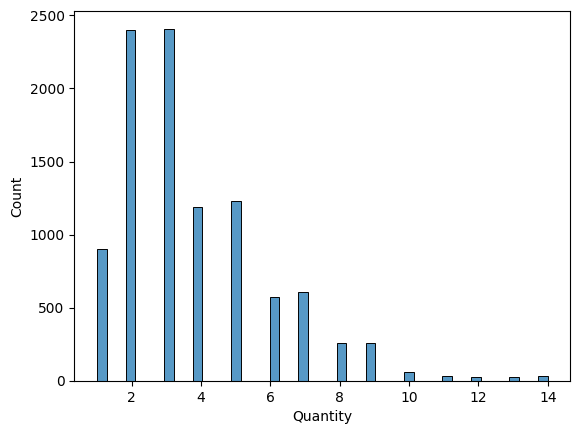

In [26]:
sns.histplot(df1['Quantity'])

In [27]:
df1['Quantity'].skew()

np.float64(1.2784155399852233)

<Axes: ylabel='Quantity'>

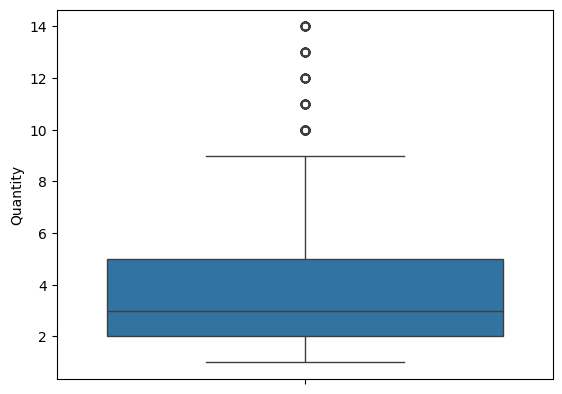

In [28]:
sns.boxplot(df1['Quantity'])

# DISCOUNT 
    * postive skew

<Axes: xlabel='Discount', ylabel='Count'>

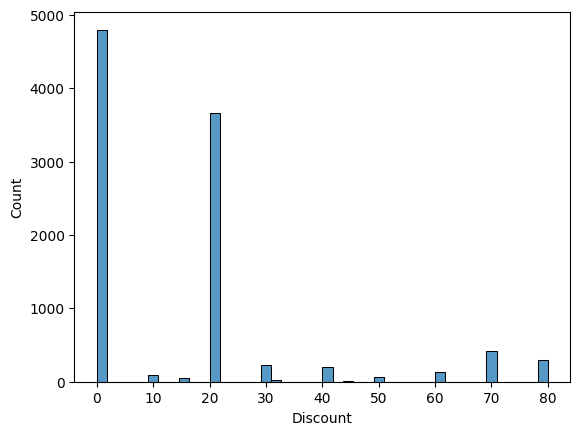

In [29]:
sns.histplot(df1['Discount'])

<Axes: ylabel='Discount'>

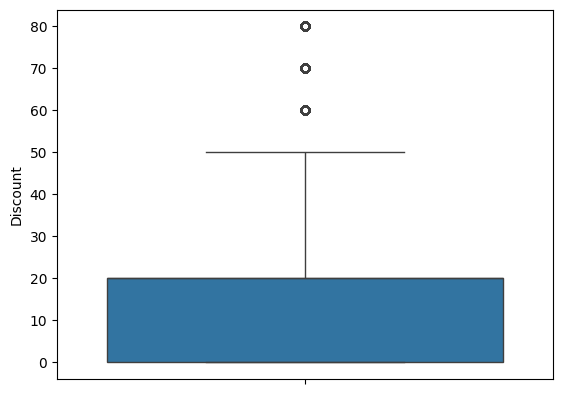

In [30]:
sns.boxplot(df1['Discount'])

In [31]:
df1.Discount.skew()

np.float64(1.6845084876700445)

# sale
    * highly positively skew
    * alot of outlier

<Axes: xlabel='Sales', ylabel='Count'>

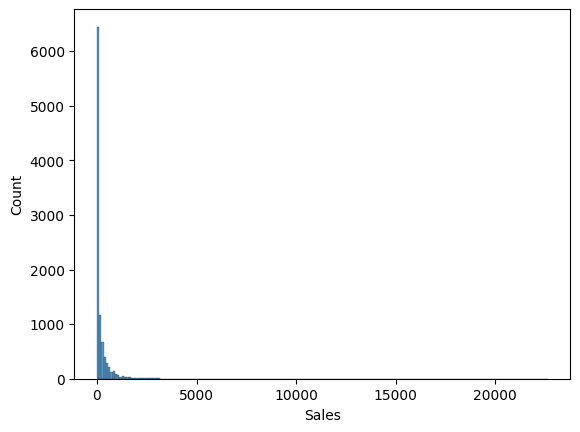

In [32]:
sns.histplot(df1['Sales'])

In [33]:
df1['Sales'].skew()

np.float64(12.972141558363262)

<Axes: ylabel='Sales'>

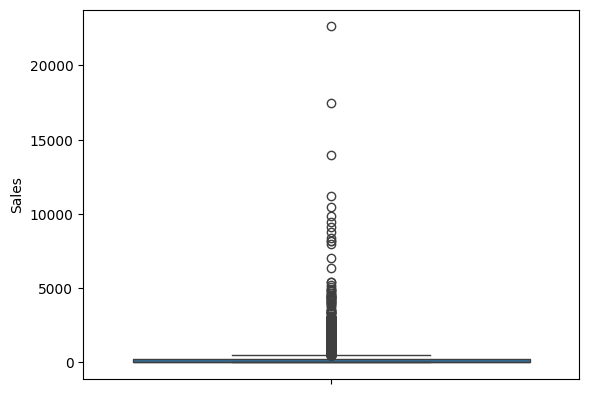

In [34]:
sns.boxplot(df1['Sales'])

# profit
    *

In [35]:
df1['Profit'].skew()

np.float64(7.561035996041442)

<Axes: >

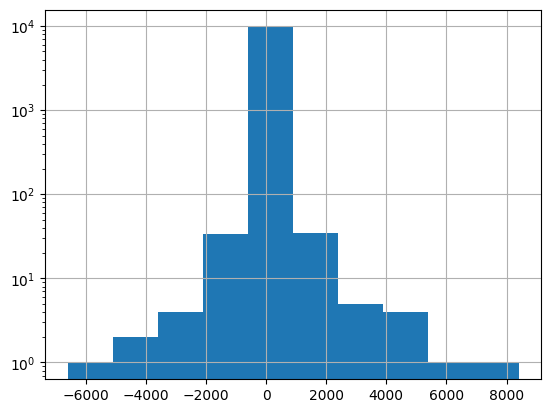

In [36]:
df['Profit'].hist(log=True)


In [37]:
df1['Profit'].describe()


count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [86]:
loss=df1[df1['Profit']<0].sort_values('Profit')


In [85]:
Profit=df1[df1['Profit']>=0].sort_values('Profit',ascending=False)


In [42]:
df1.shape

(9993, 20)

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [43]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8681,8682,CA-2016-143805,12/1/2016,12/3/2016,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,Richmond,Virginia,23223,South,OFF-SU-10004664,Office Supplies,Supplies,Acme Softgrip Scissors,40.7,5,0.0,11.803


# conculsion
    * Office Suppliers is the most Category to be sold
    * Blinders is the most Sub-Category to be sold
    * Consumer are the most segment
    * Most of the buyers are from California State

<Axes: xlabel='Category'>

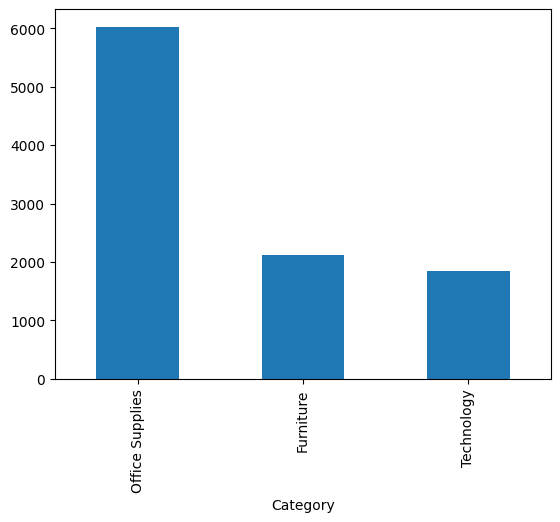

In [44]:
df1['Category'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

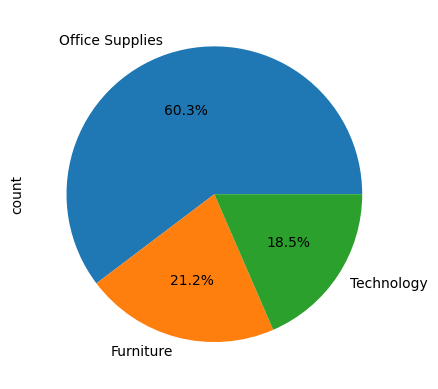

In [45]:
df1['Category'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Sub-Category'>

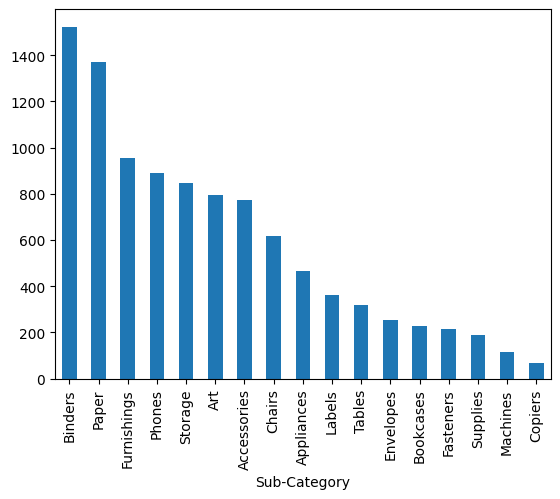

In [46]:
df1['Sub-Category'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

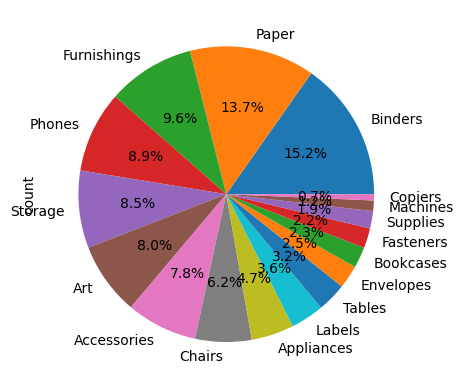

In [47]:
df1['Sub-Category'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Segment'>

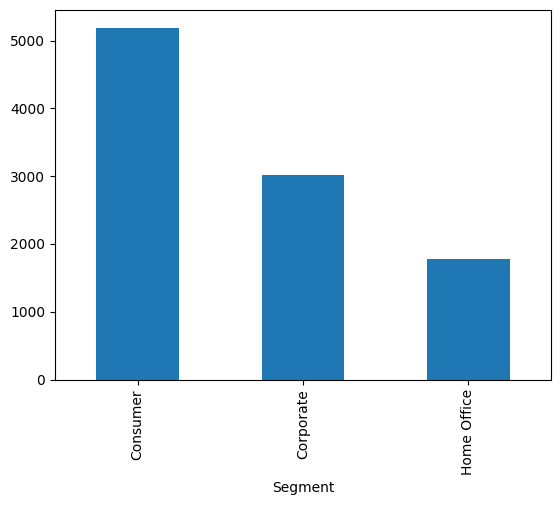

In [48]:
df1['Segment'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

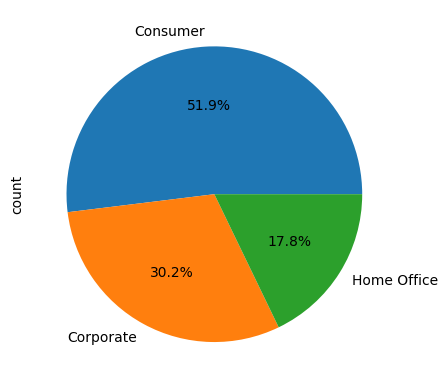

In [49]:
df1['Segment'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='State'>

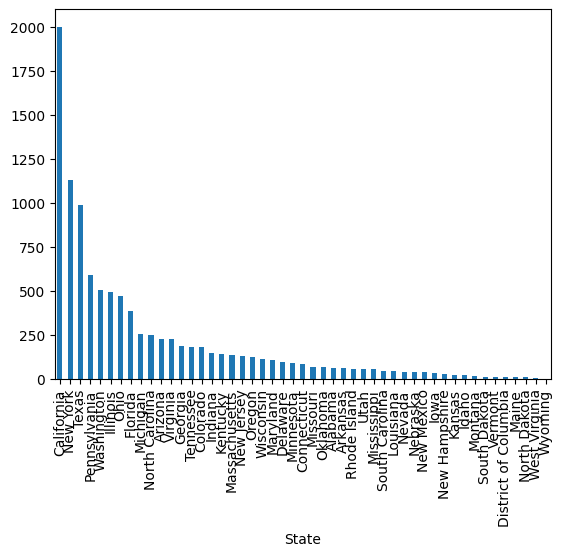

In [50]:
df1['State'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

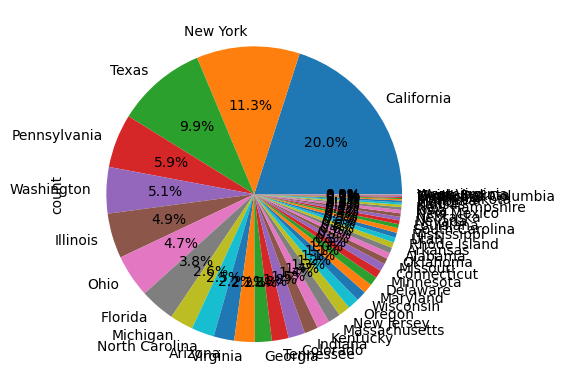

In [51]:
df1['State'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

# numerical vs numerical
    # Conclusion
    * Must of the loss cause when discount is 50%
    * When the discount is between 15 and 30 % profit are less
    * when quantity is 13 ,the profit is highest


<Axes: xlabel='Discount', ylabel='Profit'>

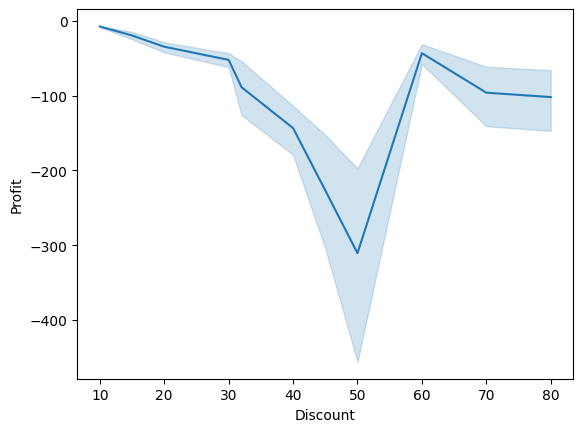

In [52]:
#Discount vs Loss
sns.lineplot(loss,y='Profit',x='Discount')

<Axes: xlabel='Discount', ylabel='Profit'>

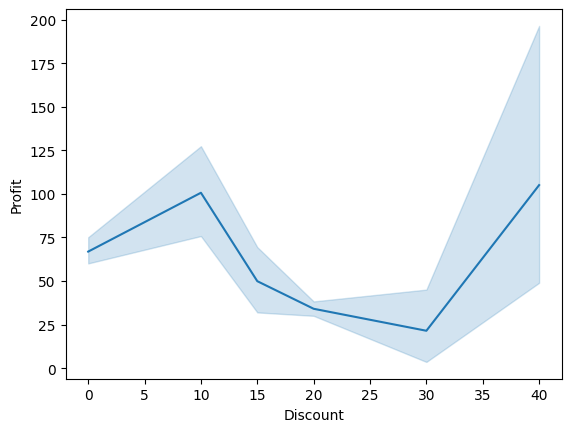

In [53]:
#Profit vs Discount
sns.lineplot(Profit,y='Profit',x='Discount')

<Axes: xlabel='Quantity', ylabel='Profit'>

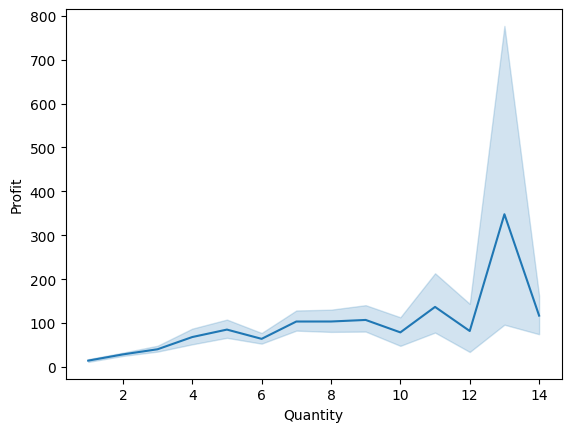

In [54]:
# Profit VS Quantity
sns.lineplot(Profit,y='Profit',x='Quantity')

<Axes: xlabel='Quantity', ylabel='Profit'>

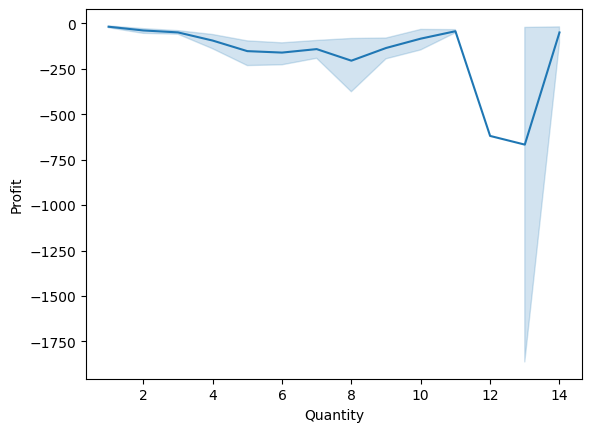

In [55]:
# loss vs quantity
sns.lineplot(loss,y='Profit',x='Quantity')

<Axes: xlabel='Sales', ylabel='Profit'>

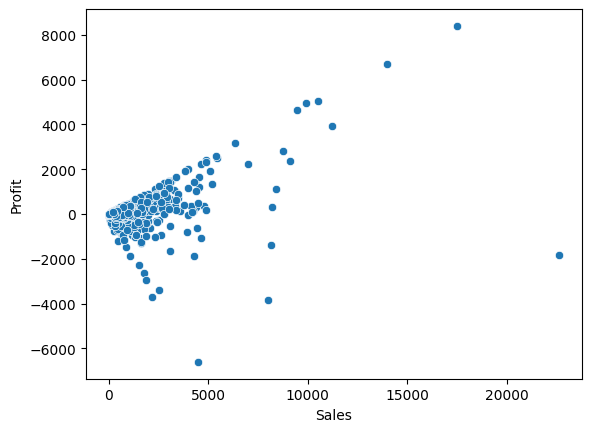

In [56]:
sns.scatterplot(x='Sales', y='Profit', data=df1)


# numerical vs categorical
    # Conclusion
    * Must of the loss is happen in january
    *new york and california state has most profit
    *technology most profile
    *new york city has most profile and pheladelpha city has most loss
    *copies has most profile
    * western and then eastern rgio has most profit
    * most profit is make when the shpping time is 4 days

In [57]:
df1.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
4911,CA-2017-127306,2017-01-14,2017-01-18,Standard Class,BH-11710,Brosina Hoffman,Consumer,Johnson City,Tennessee,37604,South,TEC-PH-10001924,Technology,Phones,iHome FM Clock Radio with Lightning Dock,111.984,2,20.0,6.999,4 days


<Axes: xlabel='Category', ylabel='Profit'>

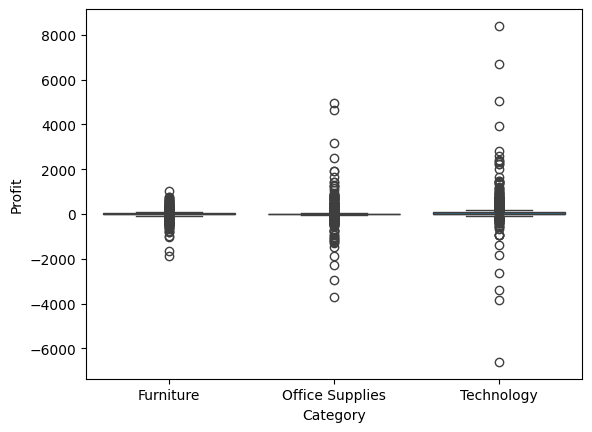

In [58]:
sns.boxplot(x='Category', y='Profit', data=df1)

<Axes: xlabel='Monthr', ylabel='Profit'>

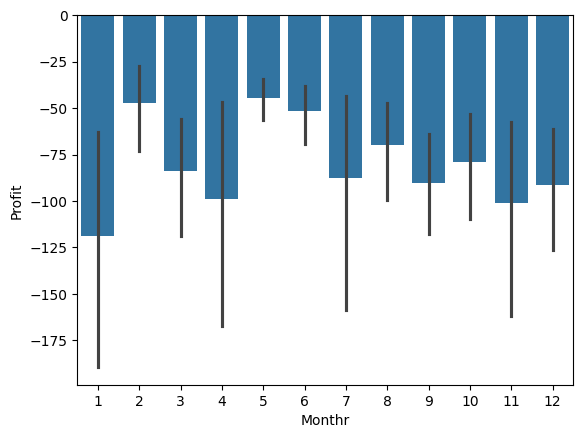

In [87]:
sns.barplot(loss,x='Monthr',y='Profit')

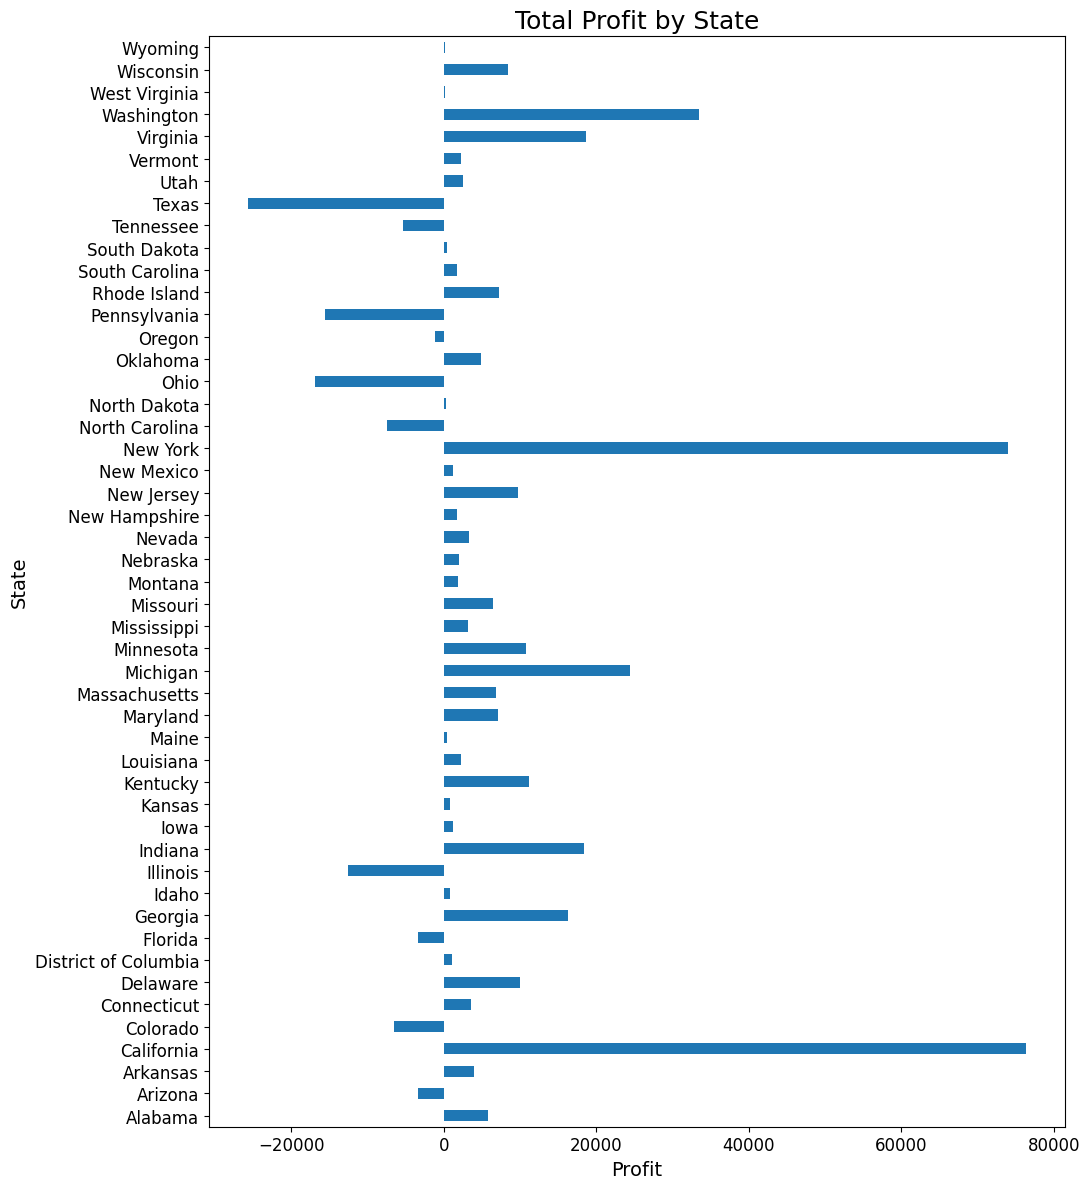

In [ ]:
# State VS Profit
plt.figure(figsize=(11,12))
df1.groupby('State')['Profit'].sum().plot(kind='barh')
plt.title('Total Profit by State', fontsize=18)
plt.xlabel('Profit', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [88]:
top_city=Profit.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
least_city=loss.groupby('City')['Profit'].sum().sort_values().head(10)

<Axes: ylabel='City'>

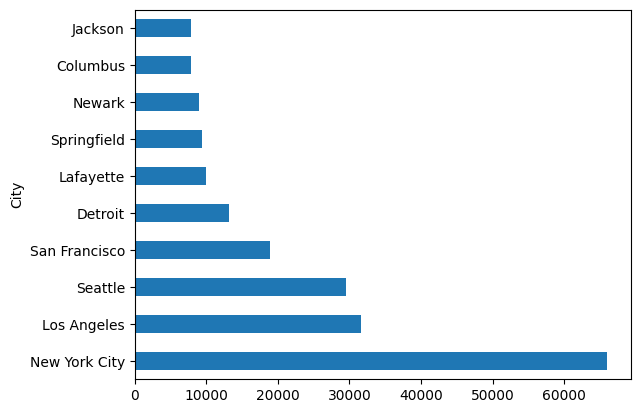

In [89]:
top_city.plot(kind='barh')

<Axes: ylabel='City'>

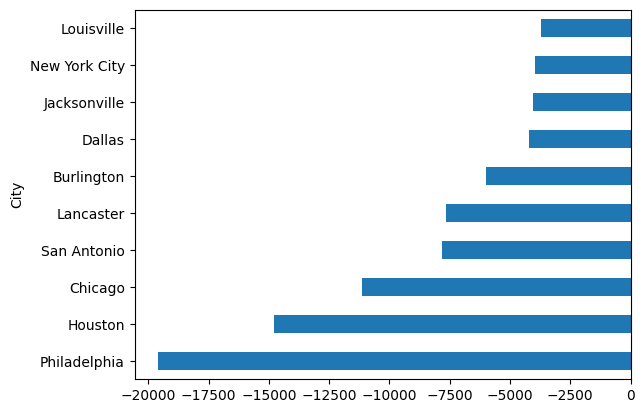

In [90]:
least_city.plot(kind='barh')

<Axes: xlabel='Category'>

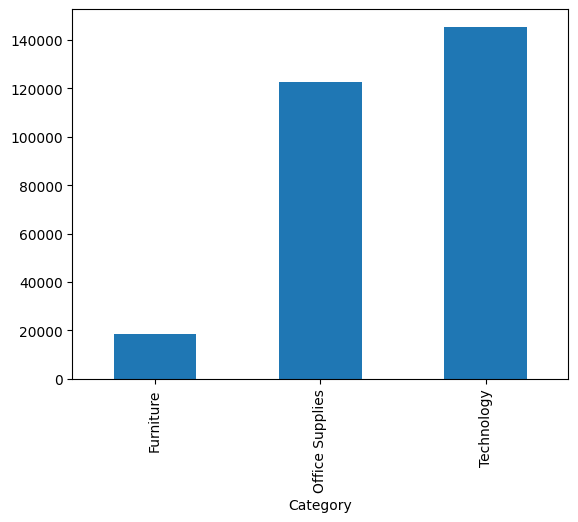

In [62]:
# Category Vs Profit
df1.groupby('Category')['Profit'].sum().plot(kind='bar')

In [83]:
df1['Monthr']=df1['Order Date'].dt.month
df1['Year']=df1['Order Date'].dt.year

In [68]:
df1

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time,Monthr,Year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0,41.9136,3 days,11,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0,219.5820,3 days,11,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0,6.8714,4 days,6,2016
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45.0,-383.0310,7 days,10,2015
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20.0,2.5164,7 days,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,20.0,4.1028,2 days,1,2014
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.0,15.6332,5 days,2,2017
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,20.0,19.3932,5 days,2,2017
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.0,13.3200,5 days,2,2017


<Axes: xlabel='Monthr', ylabel='Profit'>

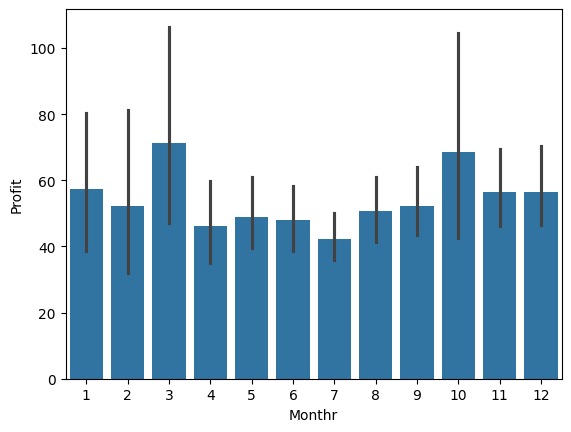

In [91]:
sns.barplot(Profit,x='Monthr',y='Profit')

<Axes: xlabel='Year', ylabel='Profit'>

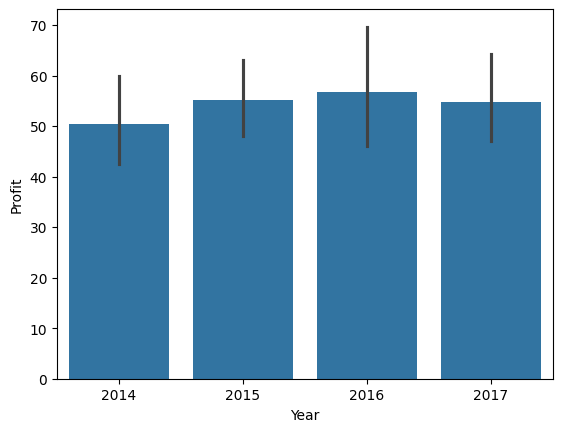

In [92]:
sns.barplot(Profit,x='Year',y='Profit')

<Axes: xlabel='Sub-Category'>

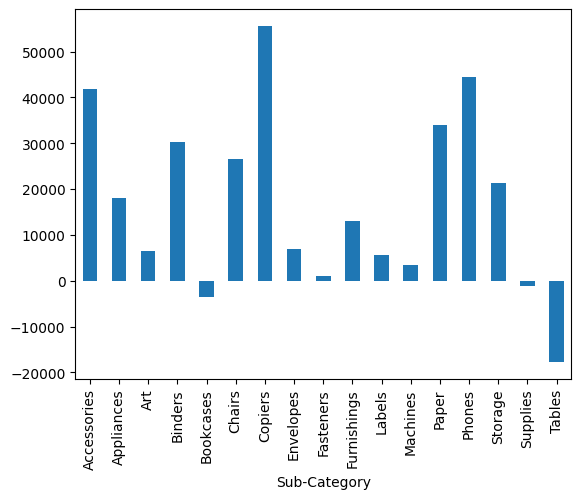

In [70]:
# Sub_Category Vs Profit
df1.groupby('Sub-Category')['Profit'].sum().plot(kind='bar')

In [71]:
df1.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time,Monthr,Year
9641,CA-2014-104563,2014-03-07,2014-03-12,Standard Class,CM-12715,Craig Molinari,Corporate,Seattle,Washington,98103,West,OFF-ST-10000934,Office Supplies,Storage,"Contico 72""H Heavy-Duty Storage System",204.9,5,0.0,0.0,5 days,3,2014


<Axes: xlabel='Region'>

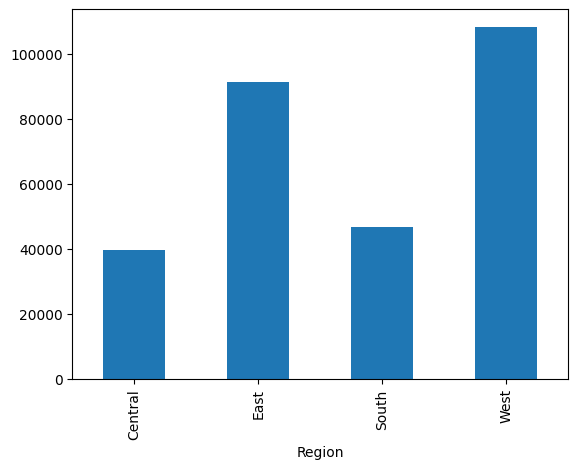

In [72]:
# Region vs profit
df1.groupby('Region')['Profit'].sum().plot(kind='bar')

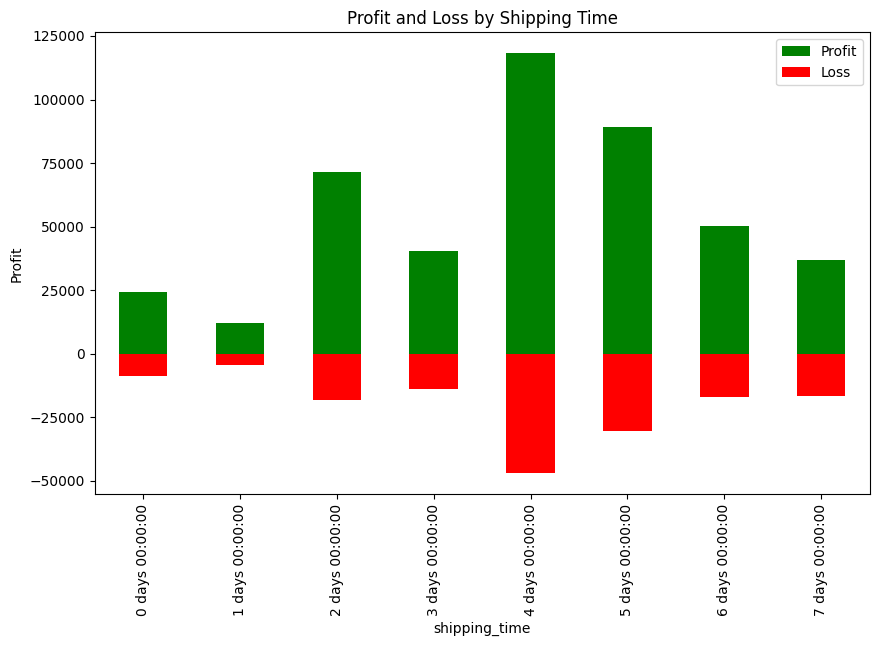

In [73]:
# Date time VS Profit loss
# Prepare the grouped data
total = df1.groupby('shipping_time')['Profit'].sum()
profit = df1[df1['Profit'] > 0].groupby('shipping_time')['Profit'].sum()
loss = df1[df1['Profit'] < 0].groupby('shipping_time')['Profit'].sum()

# Plot
plt.figure(figsize=(10, 6))
profit.plot(kind='bar', color='green', label='Profit')
loss.plot(kind='bar', color='red', label='Loss')


plt.legend()
plt.title('Profit and Loss by Shipping Time')
plt.ylabel('Profit')
plt.show()


# Categorical VS Categorical
# conclusion
*california has most customer and most of them buy office suppliers
* most of he people but paper and blinder


<Axes: >

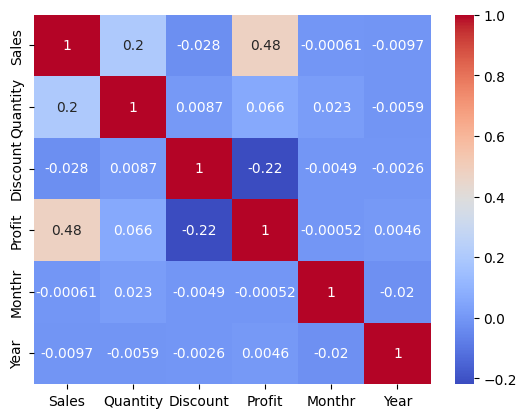

In [74]:
# we ca see which column is depended to which 
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')

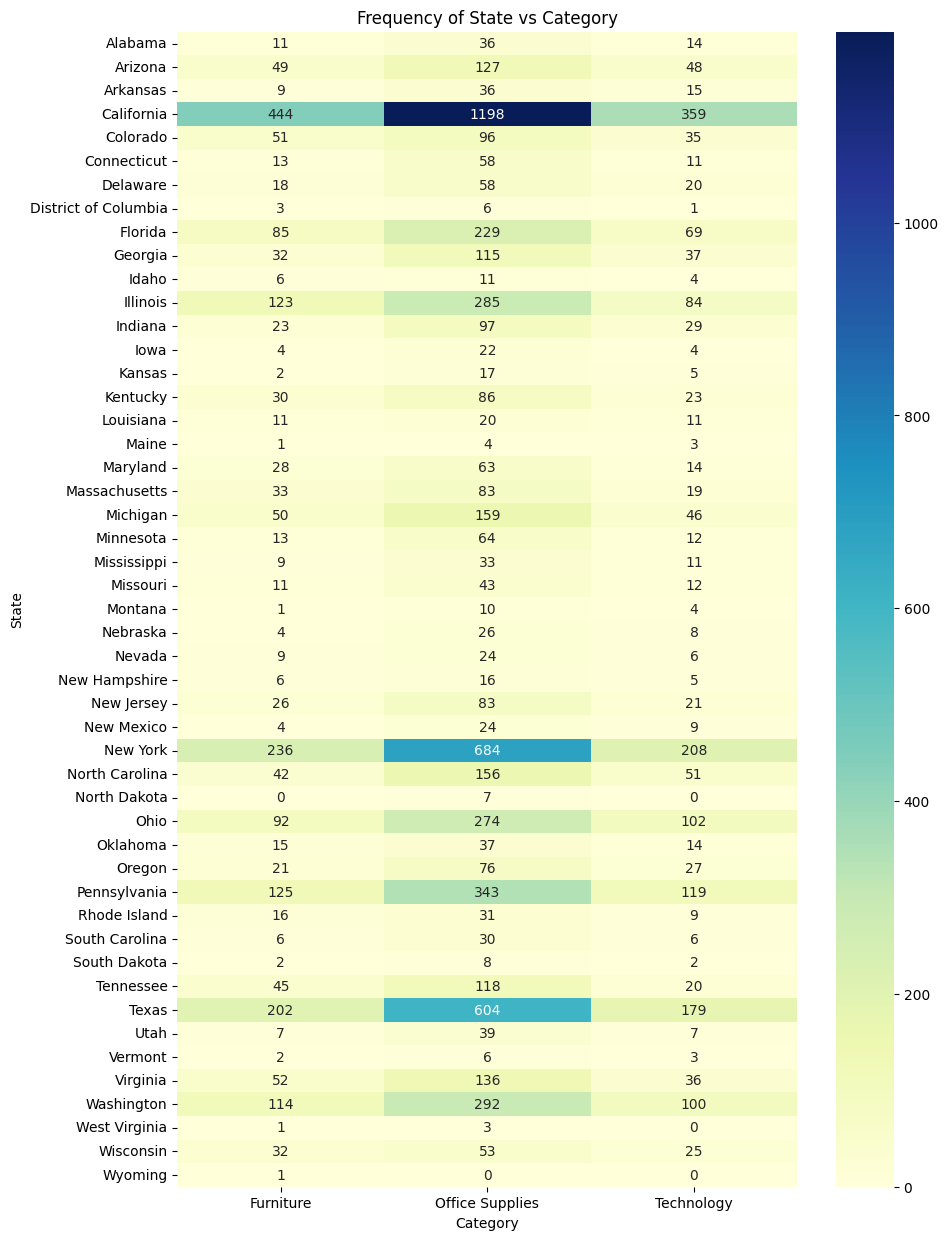

In [75]:
# Step 1: Group and count combinations
heatmap_data = df1.groupby(['State', 'Category']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 15))
# Step 2: Plot heatmap
sns.heatmap(heatmap_data,annot=True,  cmap='YlGnBu',fmt='.0f')
plt.title("Frequency of State vs Category")
plt.show()


Text(0.5, 1.0, ' State VS Sub Category')

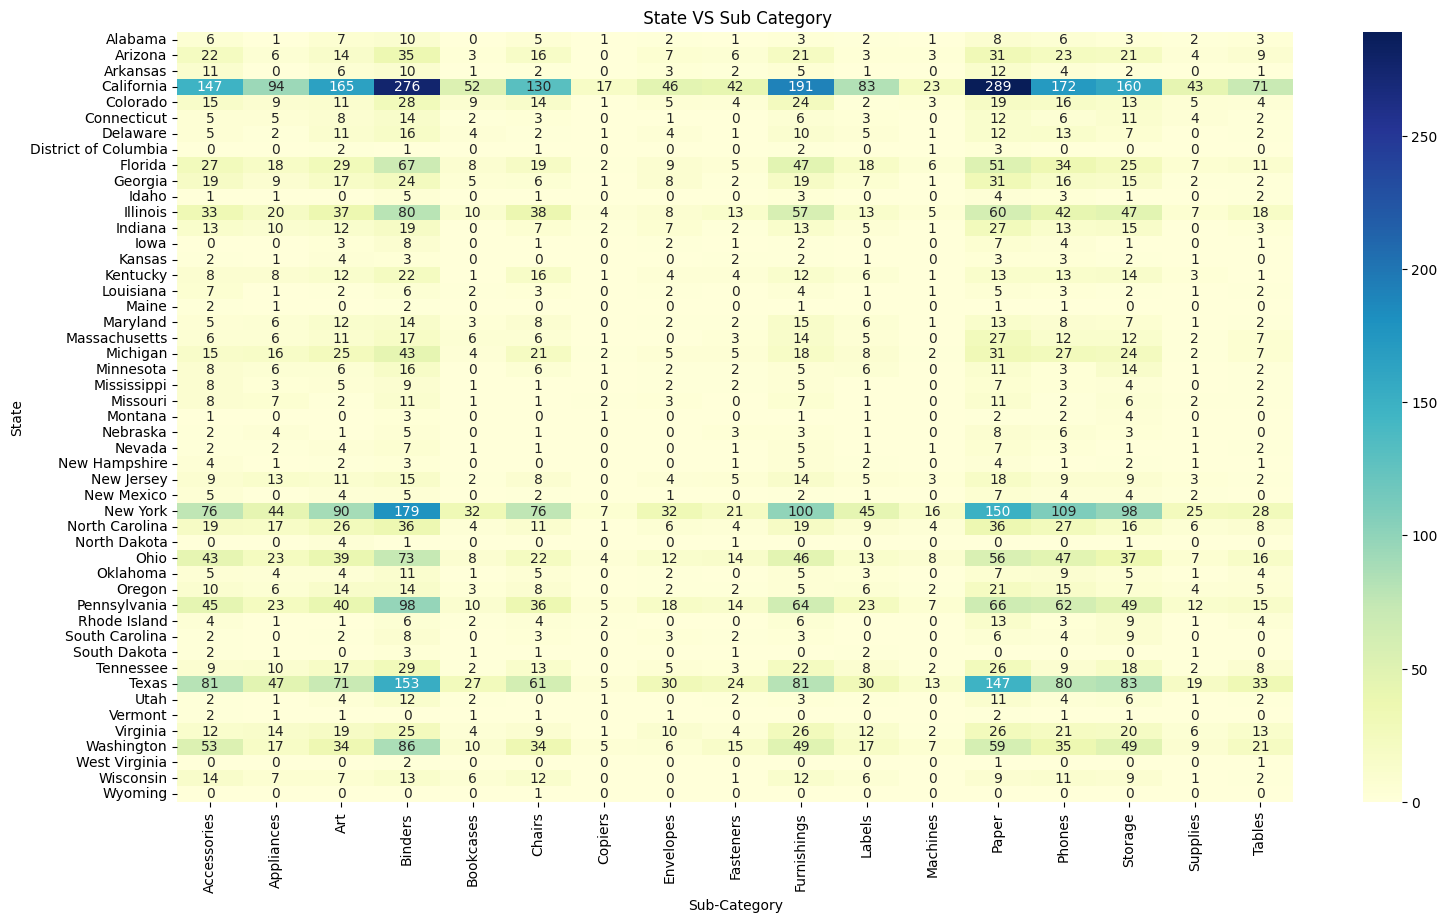

In [76]:
plt.figure(figsize=(18,10))
sub=df1.groupby(['State','Sub-Category']).size().unstack(fill_value=0)
sns.heatmap(sub,annot=True, cmap='YlGnBu',fmt='.0f')
plt.title(" State VS Sub Category")

In [94]:
Topg=Profit.head(15)
leastg=loss.head(15)

Text(0.5, 1.0, 'City Vs Subcategory')

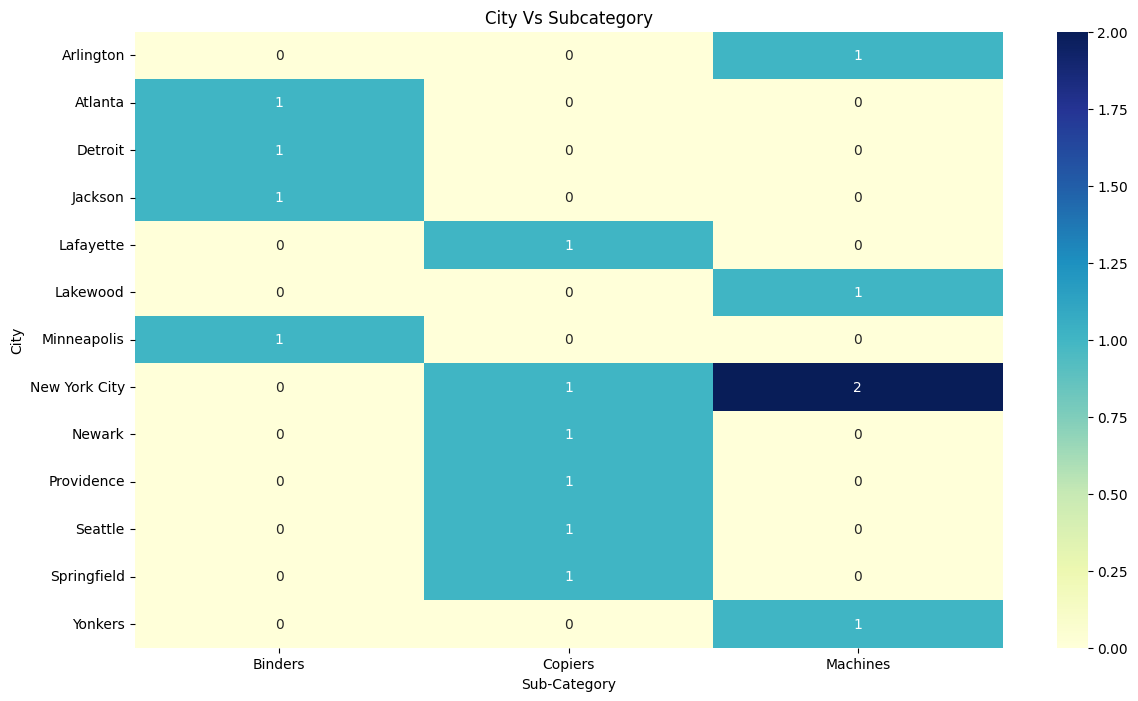

In [81]:
plt.figure(figsize=(14,8))
sub=Topg.groupby(['City','Sub-Category']).size().unstack(fill_value=0)
sns.heatmap(sub,annot=True, cmap='YlGnBu',fmt='.0f')
plt.title("City Vs Subcategory")

Text(0.5, 1.0, 'City Vs Subcategory')

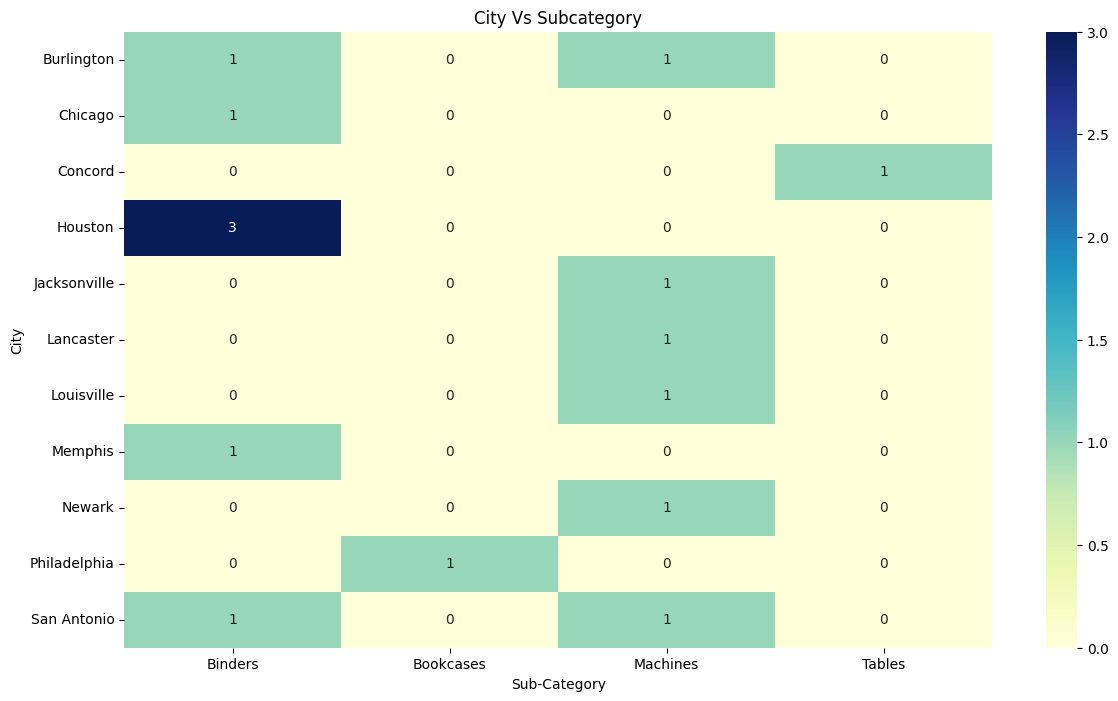

In [97]:
plt.figure(figsize=(14,8))
sub=leastg.groupby(['City','Sub-Category']).size().unstack(fill_value=0)
sns.heatmap(sub,annot=True, cmap='YlGnBu')
plt.title("City Vs Subcategory")